In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from prophet import Prophet

In [2]:
# TAHAP PRE-PROCESSING 
# Memuat Dataset
def read_df(file='C:/Users/AINUN/output.csv'):
    # Read the CSV file
    df_data = pd.read_csv(file)
    # Remove rows with missing values
    df_data = df_data.dropna()
    return df_data

df_data = read_df()

In [3]:
# Obtain general information about the dataset 
str(df_data)

'        Year     Month        State              County  Rate\n0       2015  February  Mississippi       Newton County   6.1\n1       2015  February  Mississippi       Panola County   9.4\n2       2015  February  Mississippi       Monroe County   7.9\n3       2015  February  Mississippi        Hinds County   6.1\n4       2015  February  Mississippi       Kemper County  10.6\n...      ...       ...          ...                 ...   ...\n885543  2009  November        Maine     Somerset County  10.5\n885544  2009  November        Maine       Oxford County  10.5\n885545  2009  November        Maine         Knox County   7.5\n885546  2009  November        Maine  Piscataquis County  11.3\n885547  2009  November        Maine    Aroostook County   9.0\n\n[885548 rows x 5 columns]'

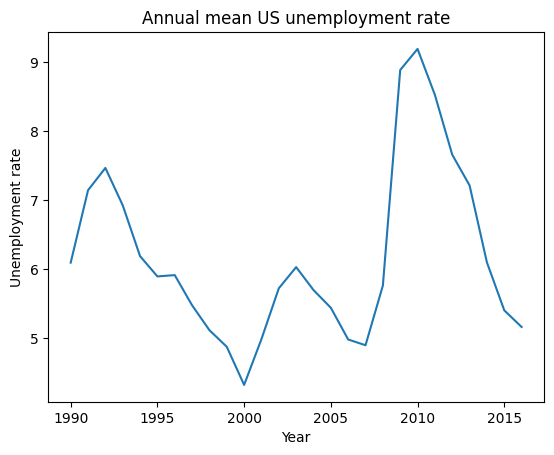

In [4]:
# Annual unemployment rate for the US from 1990 to 2016
annual_rate = df_data['Rate'].groupby(df_data['Year']).mean()
years = list(range(1990, 2017))
plt.plot(years, annual_rate)
plt.title("Annual mean US unemployment rate")
plt.xlabel("Year")
plt.ylabel("Unemployment rate")
plt.show()

In [5]:
# Prepare the data for time series analysis
# Mean Monthly employment rate sorted by year for the entire US
years = list(range(1990, 2017))
monthly_means = {}

for year in years:
    subset_data = df_data[df_data['Year'] == year]
    monthly_means[str(year)] = subset_data.groupby('Month')['Rate'].mean()

In [6]:
# Buat list kosong untuk menyimpan rata-rata bulanan
mean_monthly_rates = []

# Iterasi melalui setiap tahun
for year in range(1990, 2017):
    # Filter dataframe berdasarkan tahun
    df_year = df_data[df_data['Year'] == year]
    # Hitung rata-rata bulanan untuk tahun tersebut
    monthly_mean = df_year.groupby('Month')['Rate'].mean()
    # Tambahkan rata-rata bulanan ke dalam list
    mean_monthly_rates.extend(list(monthly_mean))

# Buat dataframe dari rata-rata bulanan
mean_monthly_rate = pd.DataFrame({
    'year': list(range(1990, 2017))*12,
    'month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']*27,
    'rate': mean_monthly_rates
})

In [5]:
#Break down into smaller datasets categorized by year
sub_1990 = df_data[df_data['Year'] == 1990]
sub_1991 = df_data[df_data['Year'] == 1991]
sub_1992 = df_data[df_data['Year'] == 1992]
sub_1993 = df_data[df_data['Year'] == 1993]
sub_1994 = df_data[df_data['Year'] == 1994]
sub_1995 = df_data[df_data['Year'] == 1995]
sub_1996 = df_data[df_data['Year'] == 1996]
sub_1997 = df_data[df_data['Year'] == 1997]
sub_1998 = df_data[df_data['Year'] == 1998]
sub_1999 = df_data[df_data['Year'] == 1999]
sub_2000 = df_data[df_data['Year'] == 2000]
sub_2001 = df_data[df_data['Year'] == 2001]
sub_2002 = df_data[df_data['Year'] == 2002]
sub_2003 = df_data[df_data['Year'] == 2003]
sub_2004 = df_data[df_data['Year'] == 2004]
sub_2005 = df_data[df_data['Year'] == 2005]
sub_2006 = df_data[df_data['Year'] == 2006]
sub_2007 = df_data[df_data['Year'] == 2007]
sub_2008 = df_data[df_data['Year'] == 2008]
sub_2009 = df_data[df_data['Year'] == 2009]
sub_2010 = df_data[df_data['Year'] == 2010]
sub_2011 = df_data[df_data['Year'] == 2011]
sub_2012 = df_data[df_data['Year'] == 2012]
sub_2013 = df_data[df_data['Year'] == 2013]
sub_2014 = df_data[df_data['Year'] == 2014]
sub_2015 = df_data[df_data['Year'] == 2015]
sub_2016 = df_data[df_data['Year'] == 2016]
# sub_2017 = df_data[df_data['Year'] == 2017]

In [8]:
mean_values = {}
for year in range(1990, 2017):
    mean_values[f'mean{year}'] = mean_monthly_rate[mean_monthly_rate['year'] == year]['rate'].tolist()
mean1990 = mean_monthly_rate[mean_monthly_rate['year'] == 1990]['rate'].tolist()
mean1991 = mean_monthly_rate[mean_monthly_rate['year'] == 1991]['rate'].tolist()
mean1992 = mean_monthly_rate[mean_monthly_rate['year'] == 1992]['rate'].tolist()
mean1993 = mean_monthly_rate[mean_monthly_rate['year'] == 1993]['rate'].tolist()
mean1994 = mean_monthly_rate[mean_monthly_rate['year'] == 1994]['rate'].tolist()
mean1995 = mean_monthly_rate[mean_monthly_rate['year'] == 1995]['rate'].tolist()
mean1996 = mean_monthly_rate[mean_monthly_rate['year'] == 1996]['rate'].tolist()
mean1997 = mean_monthly_rate[mean_monthly_rate['year'] == 1997]['rate'].tolist()
mean1998 = mean_monthly_rate[mean_monthly_rate['year'] == 1998]['rate'].tolist()
mean1999 = mean_monthly_rate[mean_monthly_rate['year'] == 1999]['rate'].tolist()
mean2000 = mean_monthly_rate[mean_monthly_rate['year'] == 2000]['rate'].tolist()
mean2001 = mean_monthly_rate[mean_monthly_rate['year'] == 2001]['rate'].tolist()
mean2002 = mean_monthly_rate[mean_monthly_rate['year'] == 2002]['rate'].tolist()
mean2003 = mean_monthly_rate[mean_monthly_rate['year'] == 2003]['rate'].tolist()
mean2004 = mean_monthly_rate[mean_monthly_rate['year'] == 2004]['rate'].tolist()
mean2005 = mean_monthly_rate[mean_monthly_rate['year'] == 2005]['rate'].tolist()
mean2006 = mean_monthly_rate[mean_monthly_rate['year'] == 2006]['rate'].tolist()
mean2007 = mean_monthly_rate[mean_monthly_rate['year'] == 2007]['rate'].tolist()
mean2008 = mean_monthly_rate[mean_monthly_rate['year'] == 2008]['rate'].tolist()
mean2009 = mean_monthly_rate[mean_monthly_rate['year'] == 2009]['rate'].tolist()
mean2010 = mean_monthly_rate[mean_monthly_rate['year'] == 2010]['rate'].tolist()
mean2011 = mean_monthly_rate[mean_monthly_rate['year'] == 2011]['rate'].tolist()
mean2012 = mean_monthly_rate[mean_monthly_rate['year'] == 2012]['rate'].tolist()
mean2013 = mean_monthly_rate[mean_monthly_rate['year'] == 2013]['rate'].tolist()
mean2014 = mean_monthly_rate[mean_monthly_rate['year'] == 2014]['rate'].tolist()
mean2015 = mean_monthly_rate[mean_monthly_rate['year'] == 2015]['rate'].tolist()
mean2016 = mean_monthly_rate[mean_monthly_rate['year'] == 2016]['rate'].tolist()
# mean2017 = mean_monthly_rate[mean_monthly_rate['year'] == 2017]['rate'].tolist()

In [9]:
mean_monthly_rate_str = mean_monthly_rate.to_string()
print(mean_monthly_rate_str)

     year month       rate
0    1990   Jan   6.006778
1    1991   Feb   5.616200
2    1992   Mar   6.658384
3    1993   Apr   7.123685
4    1994   May   7.055016
5    1995   Jun   5.749621
6    1996   Jul   5.704363
7    1997   Aug   6.516672
8    1998   Sep   5.614321
9    1999   Oct   6.119110
10   2000   Nov   5.424032
11   2001   Dec   5.517299
12   2002   Jan   7.065440
13   2003   Feb   6.466522
14   2004   Mar   7.277609
15   2005   Apr   8.315527
16   2006   May   8.096272
17   2007   Jun   6.894978
18   2008   Jul   7.276875
19   2009   Aug   8.015529
20   2010   Sep   6.954444
21   2011   Oct   6.753838
22   2012   Nov   6.143045
23   2013   Dec   6.250097
24   2014   Jan   7.304289
25   2015   Feb   6.939348
26   2016   Mar   7.161078
27   1990   Apr   8.954110
28   1991   May   8.888975
29   1992   Jun   7.311343
30   1993   Jul   7.787593
31   1994   Aug   8.320381
32   1995   Sep   7.211897
33   1996   Oct   6.849840
34   1997   Nov   6.309038
35   1998   Dec   6.583366
3

In [10]:
mean_monthly_rate.head()

,year,month,rate
0,1990,Jan,6.006778
1,1991,Feb,5.616200
2,1992,Mar,6.658384
3,1993,Apr,7.123685
4,1994,May,7.055016


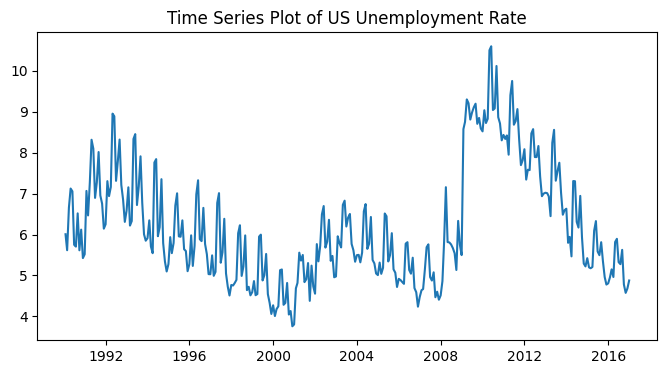

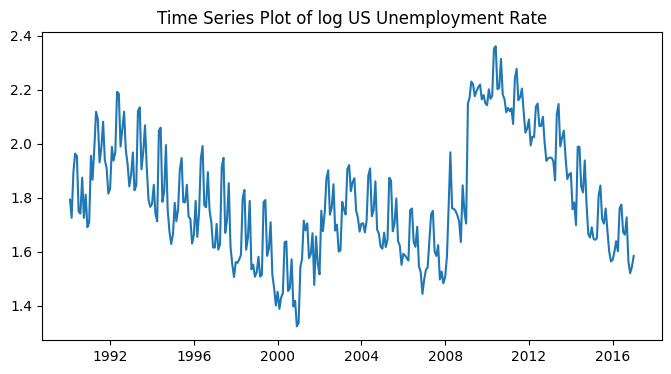

In [11]:
# Convert to time series using pd.Series
US_UnempRate_ts = pd.Series(mean_monthly_rate['rate'].values, index=pd.date_range(start='1990-01-01', periods=len(mean_monthly_rate), freq='M'))

# Plot the time series
plt.figure(figsize=(8, 4))
plt.plot(US_UnempRate_ts)
plt.title('Time Series Plot of US Unemployment Rate')
plt.show()

# Plot the log transformed time series
plt.figure(figsize=(8, 4))
plt.plot(np.log(US_UnempRate_ts))
plt.title('Time Series Plot of log US Unemployment Rate')
plt.show()

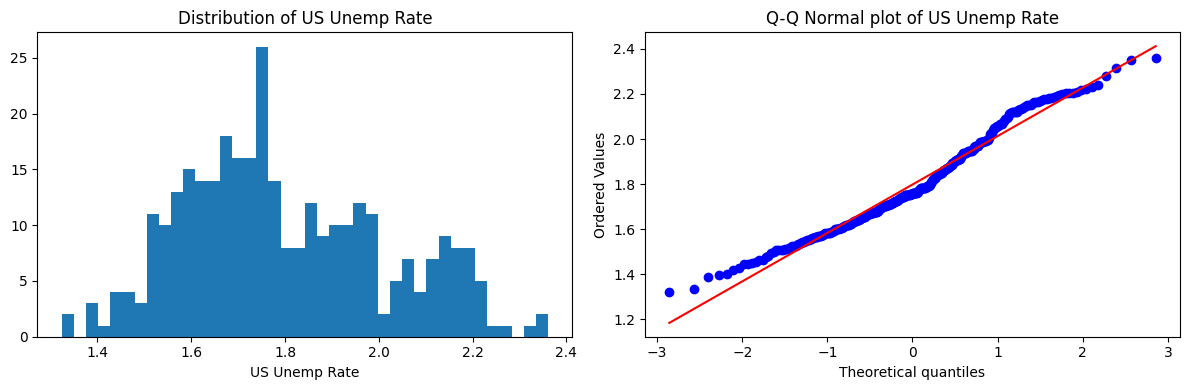

In [12]:
import scipy.stats as stats

def dist_ts(data, col='residual', bins=40):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Histogram plot
    axes[0].hist(data, bins=bins)
    axes[0].set_title(f'Distribution of {col}')
    axes[0].set_xlabel(col)
    
    # QQ plot
    stats.probplot(data, plot=axes[1])
    axes[1].set_title(f'Q-Q Normal plot of {col}')
    
    plt.tight_layout()
    plt.show()

dist_ts(np.log(US_UnempRate_ts), col='US Unemp Rate')

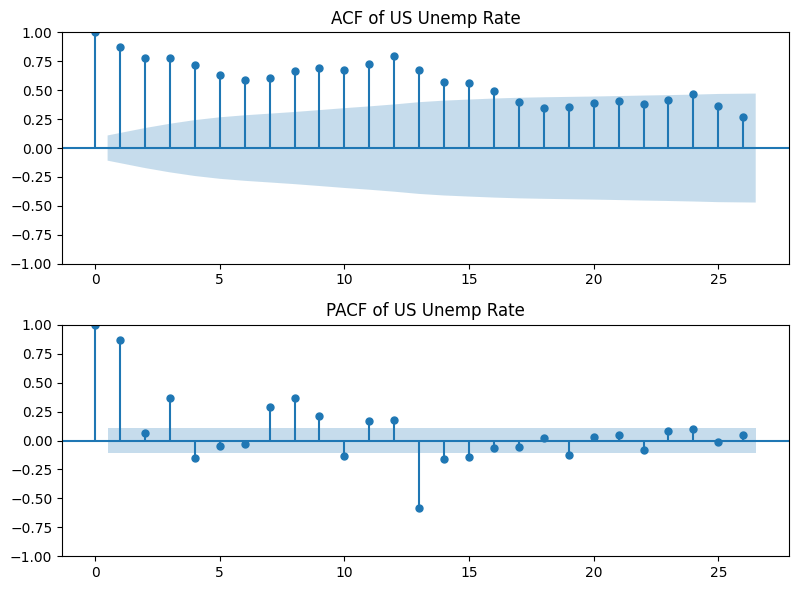

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def plot_acf_pacf(data, col='remainder'):
    fig, axes = plt.subplots(2, 1, figsize=(8, 6))
    
    # ACF plot
    plot_acf(data, ax=axes[0], title=f'ACF of {col}')
    
    # PACF plot
    plot_pacf(data, ax=axes[1], title=f'PACF of {col}')
    
    plt.tight_layout()
    plt.show()

plot_acf_pacf(np.log(US_UnempRate_ts), col='US Unemp Rate')

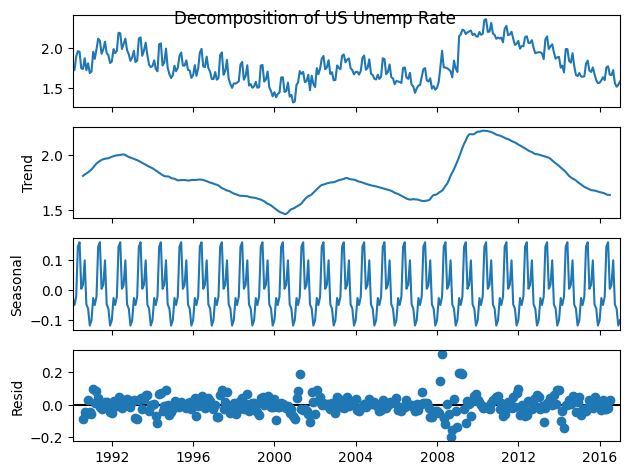

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  324
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 488.889
Date:                Fri, 03 Nov 2023   AIC                           -969.777
Time:                        07:04:12   BIC                           -954.654
Sample:                    01-31-1990   HQIC                          -963.741
                         - 12-31-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.851e-05      0.004     -0.024      0.981      -0.007       0.007
ar.L1         -0.3697      0.089     -4.164      0.000      -0.544      -0.196
ma.L1          0.6871      0.083      8.252      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  324
Model:                 ARIMA(3, 0, 4)   Log Likelihood                 510.103
Date:                Fri, 03 Nov 2023   AIC                          -1002.207
Time:                        07:04:18   BIC                           -968.180
Sample:                    01-31-1990   HQIC                          -988.625
                         - 12-31-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.000      0.303      0.762      -0.001       0.001
ar.L1          0.9757      0.121      8.068      0.000       0.739       1.213
ar.L2         -0.6133      0.179     -3.432      0.0

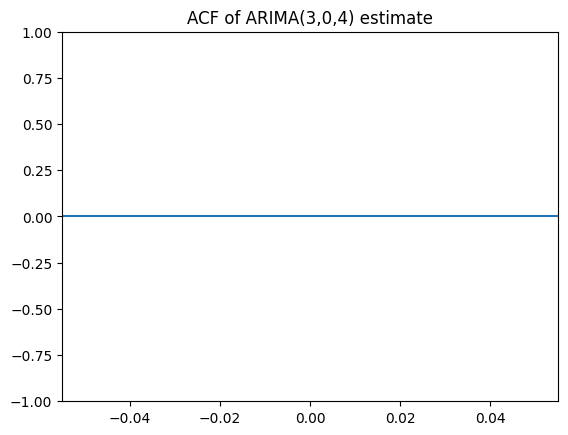

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
import warnings

def ts_decomp(df, col='Series Name', freq=12):
    result = seasonal_decompose(df, model='additive', period=freq)
    
    result.plot()
    plt.suptitle(f'Decomposition of {col}')
    plt.show()
    
    residual = df - result.seasonal - result.trend
    return residual

US_Unemp_decomp = ts_decomp(np.log(US_UnempRate_ts), col='US Unemp Rate', freq=12)

def ts_model(ts, col='remainder', order=(0, 0, 1)):
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")
        mod = ARIMA(ts, order=order)
        result = mod.fit()
    print(result.summary())
    return result

arima_estimate1 = ts_model(US_Unemp_decomp, col='remainder', order=(1, 0, 1))
arima_estimate2 = ts_model(US_Unemp_decomp, col='remainder', order=(0, 1, 1))
arima_estimate3 = ts_model(US_Unemp_decomp, col='remainder', order=(1, 1, 3))
arima_estimate4 = ts_model(US_Unemp_decomp, col='remainder', order=(0, 1, 5))
arima_estimate5 = ts_model(US_Unemp_decomp, col='remainder', order=(2, 1, 3))
arima_estimate6 = ts_model(US_Unemp_decomp, col='remainder', order=(3, 0, 4))
arima_estimate7 = ts_model(US_Unemp_decomp, col='remainder', order=(4, 0, 5))
arima_estimate8 = ts_model(US_Unemp_decomp, col='remainder', order=(4, 1, 5))

with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    plot_acf(arima_estimate6.resid[1:], title='ACF of ARIMA(3,0,4) estimate')
plt.show()

In [16]:
from pmdarima import auto_arima

fit_US_Unemp = auto_arima(np.log(US_UnempRate_ts), max_p=5, max_q=5, max_P=2,
                          max_Q=2, max_order=5, max_d=2, max_D=2, start_p=0,
                          start_q=0, start_P=0, start_Q=0, seasonal=False)
model_US_Unemp = ARIMA(np.log(US_UnempRate_ts), order=(fit_US_Unemp.order[0], fit_US_Unemp.order[1], fit_US_Unemp.order[2]))
result_US_Unemp = model_US_Unemp.fit()

print(result_US_Unemp.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  324
Model:                 ARIMA(3, 1, 0)   Log Likelihood                 291.395
Date:                Fri, 03 Nov 2023   AIC                           -574.790
Time:                        07:04:34   BIC                           -559.680
Sample:                    01-31-1990   HQIC                          -568.758
                         - 12-31-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1329      0.069     -1.935      0.053      -0.268       0.002
ar.L2         -0.3826      0.044     -8.632      0.000      -0.470      -0.296
ar.L3          0.1266      0.056      2.254      0.0

            Forecast
Time                
2016-12-31  1.564596
2017-01-31  1.554496
2017-02-28  1.568612
2017-03-31  1.568089
2017-04-30  1.561479
2017-05-31  1.564344
2017-06-30  1.566426
2017-07-31  1.564216
2017-08-31  1.564076
2017-09-30  1.565204
2017-10-31  1.564828
2017-11-30  1.564429
             lower y   upper y
2017-01-31  1.372330  1.756862
2017-02-28  1.300016  1.808975
2017-03-31  1.296435  1.840789
2017-04-30  1.262026  1.874152
2017-05-31  1.217121  1.905837
2017-06-30  1.196282  1.932405
2017-07-31  1.175301  1.957551
2017-08-31  1.147102  1.981331
2017-09-30  1.124468  2.003684
2017-10-31  1.105302  2.025105
2017-11-30  1.084224  2.045432
2017-12-31  1.063962  2.064895


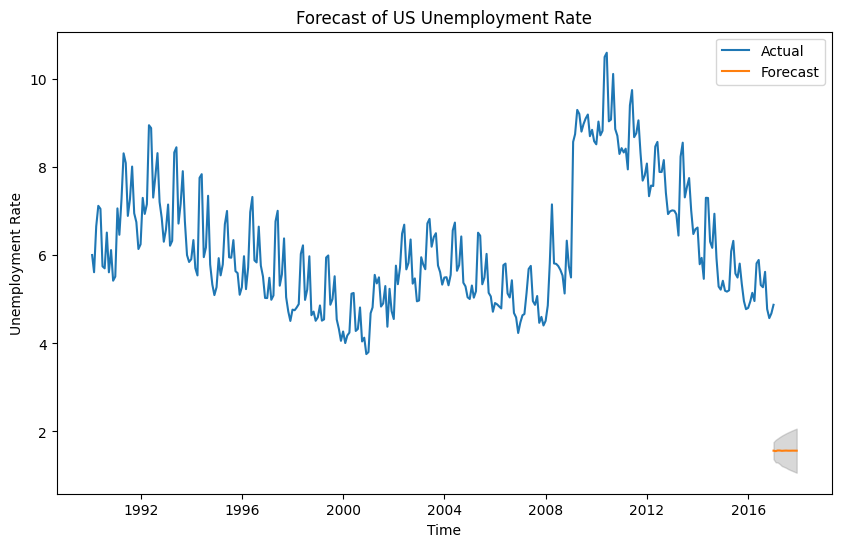

In [17]:
# Get the forecasted values
forecast_values = result_US_Unemp.predict(start=len(US_UnempRate_ts), end=len(US_UnempRate_ts)+11)

# Get the confidence intervals
confidence_intervals = result_US_Unemp.get_forecast(steps=12).conf_int()

# Create a DataFrame for the forecasted values
forecast_summary = pd.DataFrame({'Forecast': forecast_values})
forecast_summary.index = pd.date_range(start=US_UnempRate_ts.index[-1], periods=12, freq='M')
forecast_summary.index.name = 'Time'

# Print the forecast summary
print(forecast_summary)

# Print the confidence intervals
print(confidence_intervals)

# Plot the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(US_UnempRate_ts, label='Actual')
plt.plot(forecast_summary['Forecast'], label='Forecast')
plt.fill_between(forecast_summary.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='gray', alpha=0.3)
plt.xlabel('Time')
plt.ylabel('Unemployment Rate')
plt.title('Forecast of US Unemployment Rate')
plt.legend()
plt.show()

In [18]:
import math

data = {
    'year': [2016, 2016, 2016, 2016, 2016, 2016, 2016],
    'month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul'],
    'forecasted': [round(math.exp(1.678036), 2), round(math.exp(1.687569), 2), round(math.exp(1.668689), 2),
                   round(math.exp(1.601984), 2), round(math.exp(1.567450), 2), round(math.exp(1.636896), 2),
                   round(math.exp(1.629164), 2)],
    'actual': [5.1, 4.9, 4.6, 4.1, 4.1, 4.5, 4.6]
}

forecast_vs_actual = pd.DataFrame(data)
print(forecast_vs_actual.head(7))


   year month  forecasted  actual
0  2016   Jan        5.36     5.1
1  2016   Feb        5.41     4.9
2  2016   Mar        5.31     4.6
3  2016   Apr        4.96     4.1
4  2016   May        4.79     4.1
5  2016   Jun        5.14     4.5
6  2016   Jul        5.10     4.6
